
**ED2 - Histograma**

Aluno: Mauricio dos Santos de Jesus


**Estudo dirigido 2**

A imagem (castle.jpg) em tons de cinza(uint8), mostrada abaixo,
contém uma mistura de pixels de fundo mais escuros e pixels de primeiro
plano mais claros. Um histograma de intensidades de imagem também é
mostrado. Resolva as tarefas abaixo:

• Leia a imagem e calcule o histograma da imagem como um vetor de
elemento 256x1 usando uma função de calculo de histograma (por
exemplo, no Matlab ihist()) e armazene o resultado na variável H.

• Determine o nível de cinza que ocorre com mais frequência na imagem e
armazene isso na variável M.

• Inspecione visualmente o histograma da imagem e determine um limite
adequado e armazene-o na variável T.

• Calcule a imagem binária lógica correspondente a esse limite utilizando
uma função de threshold.

• Plote a imagem binaria lógica.

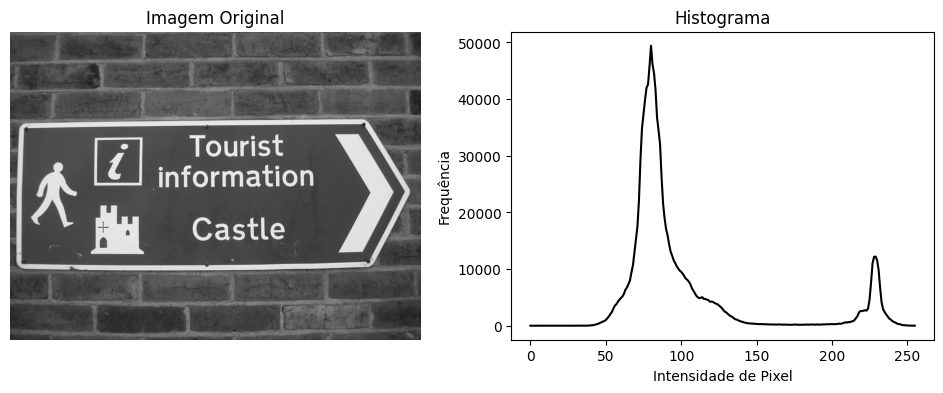

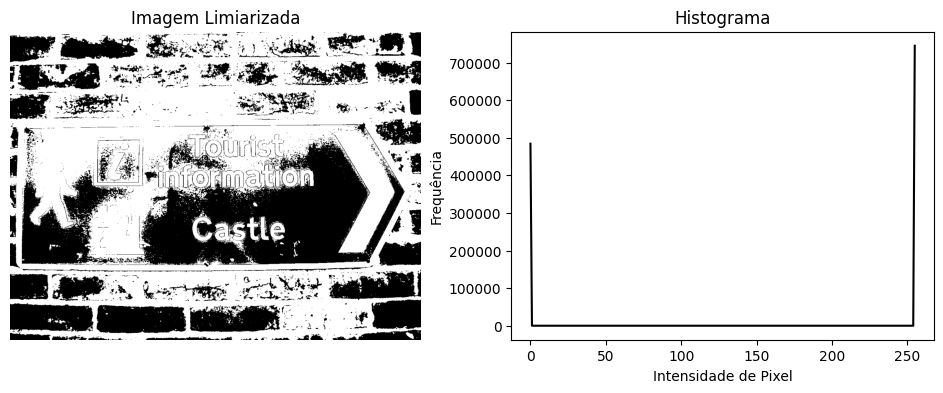

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def carregar_imagem(caminho):
    imagem = cv.imread(caminho)
    imagem_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
    return imagem_cinza

def plotar_imagem_e_histograma(imagem, titulo_imagem="Imagem Original"):
    plt.figure(figsize=(12, 4))

    # Plotar a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(imagem, cmap="gray")
    plt.title(titulo_imagem)
    plt.axis('off')

    # Calcular e plotar o histograma
    plt.subplot(1, 2, 2)
    hist = cv.calcHist([imagem], [0], None, [256], [0, 256])
    plt.plot(hist, color="black")
    plt.title("Histograma")
    plt.xlabel("Intensidade de Pixel")
    plt.ylabel("Frequência")

    plt.show()

def aplicar_limiarizacao(imagem, limiar):
    _, imagem_binaria = cv.threshold(imagem, limiar, 255, cv.THRESH_BINARY)
    return imagem_binaria

def main():
    # Carregar a imagem em escala de cinza
    caminho_imagem = "/content/castle.jpg"
    imagem_original = carregar_imagem(caminho_imagem)

    # Plotar a imagem e o histograma original
    plotar_imagem_e_histograma(imagem_original, "Imagem Original")

    # Calcular o histograma
    hist = cv.calcHist([imagem_original], [0], None, [256], [0, 256])

    # Encontrar limiar ótimo
    valor_maximo = hist.max()
    limiar_otimo = np.argwhere(hist == valor_maximo)[0][0]

    # Aplicar limiarização
    imagem_limiarizada = aplicar_limiarizacao(imagem_original, limiar_otimo)

    # Salvar a imagem limiarizada e plotar
    plt.imsave("castle_sign.png", imagem_limiarizada, cmap="gray")
    plotar_imagem_e_histograma(imagem_limiarizada, "Imagem Limiarizada")

if __name__ == "__main__":
    main()
